# How to determine whether or not 20 million people from a larger population like a particular movie idea?

## Purpose of the document

To describe an algorithm using which I can find out whether or not at least 20 million people (out of a much larger population) will like a particular idea, based on a poll with 10-100 people.


## Playground

Number of respondents

In [3]:
respondents_count = 10 # 10 for 10 people, 100 for 100 etc.

Required number of people who like the movie

In [4]:
required_lovers = 20000000 # e. g. 20 million

Total population size

In [5]:
total_population = 140000000 # e. g. 140 million for Russia, 330 million for the US

In [6]:
P = required_lovers / total_population

In [7]:
print(P)

0.14285714285714285


In [8]:
1/7

0.14285714285714285

Plot a binomial distribution with parameters `(respondents_count, P)`

0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

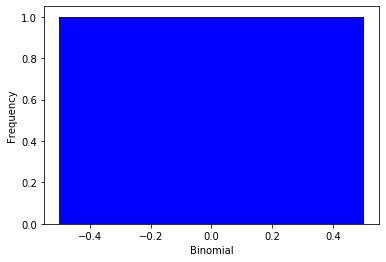

In [11]:
import seaborn as sb, numpy as np
from scipy.stats import binom
#data_binom =binom.rvs(size=10,n=20,p=0.8)
data_binom = binom.rvs(n=respondents_count,p=P,loc=0,size=10)
print(data_binom)
ax = sb.distplot(data_binom,kde=True,color='blue',hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

Take the number of successes in the sample.

In [10]:
successes_in_sample = 80

> see how likely that was to have happened in this distribution



Another approach from [here](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/):

$P(X) = \frac{n!}{(n - X)!X!}(p)^X*(1-p)^{n-X}$

 * $n$ - number of trials. In our case number of respondents.
 * $X$ - total number of successes.
 * $p$ - probability of success of any given trial, $P$ (1/7 in case of 140 million people in the population)

In [15]:
import math

def bin_prob(x, n, p):
    n_fact = math.factorial(n)
    n_minus_x_fact = math.factorial(n-x)
    x_fact = math.factorial(x)
    return n_fact/(n_minus_x_fact*x_fact)*(p**x)*((1-p)**(n-x))

Let's look at the whole thing for 140 million population and a 100 trials.

In [17]:
bin_prob(1.0, 100.0, 1/7) # 1 success in a sample of 100 trials, 140 mill. population, 20 mill. req. audience

3.3664315361698167e-06

In [18]:
bin_prob(100.0, 100.0, 1/7) # 100 successes in a sample of 100 trials, 140 mill. population, 20 mill. req. audience

3.0916904080902036e-85